## Final Project Submission

Please fill out:
* Student name: Alexandra Clemm
* Student pace: self-paced
* Scheduled project review date/time: MONDAY, JULY 29 2019, 10:00 pm CENTRAL TIME (+ 1:00 hr)
* Instructor name: Eli Thomas 
* Blog post URL: https://lexxilearnsdata.blogspot.com/2019/07/how-to-explore-available-data-module-1.html
* Video Walk-Through URL: https://youtu.be/KovATH5w_ec

# Introduction - Using the OSEMiN approach to tackle a data science project

When working with data respectively when approaching a dataset including some attached research questions, it is necessary to have some scheme in how to aproach this matter in mind. For current Data Science processes there are several approaches used. One of the most common ones is the OSEMiN approach (pronounced as "AWESOME"), which we'll be using for this project and which will be quickly outlined below:

The OSEMiN approach consists of 5 steps (each beginning with the first letter of the OSEMiN word (duh! :))

    Obtaining the data 
    Scrubbing the data
    Exploring the data
    Modeling the data
    Interpreting the data

#### Obtaining 
basically means to load the data and inspect it (what's the data that I will be using, how many and which columns are there). Getting an overview of the data food

#### Scrubbing
basically means to clean the data by e.g. detect missing values, getting rid of columns or rows that are negatively influecing the dataset, replacing/handling missing values, changing data types etc.

#### Exploring
basically means to understand the data. Here we will mainly be looking at descriptive statistics and its visualizations

#### Modeling
is the step were we actually work with mathematical tools to check out the relationship between our predictor variables and the target variable

#### Interpreting
is the last step of our OSEMiN approach, where we are drawing conclusions from all the output that we got from the last 2 steps (exploration & modeling). It's also where we evalute the meaning of our results and in the very last step where we communicate the results to our stakeholders - For me this seems like the most important and most challenging step


#### Also important to mention here is that all data science processes (if done correctly) are normally iterative, meaning that you might have to go back and forth between the steps of the process in order to end up with the perfect model, which you can draw reasonable conclusions from.



# Introduction - Short Project Overview

This project will deal with a dataset containing information about House Sales in King County, USA. In order to kick-off with some knowledge about the data that we will be working on here are some key facts abouit King County :

King County is a county located at the north western coast of the United States. It is part of the U.S. State Washington, whereas the largest city of Wahsington is Seattle.

However King County is ranked the most populous county in Washington (based on the Wikipedia entry: https://en.wikipedia.org/wiki/King_County,_Washington), why it makes total sense to check out the House Sales in King County and it's predictors in detail.


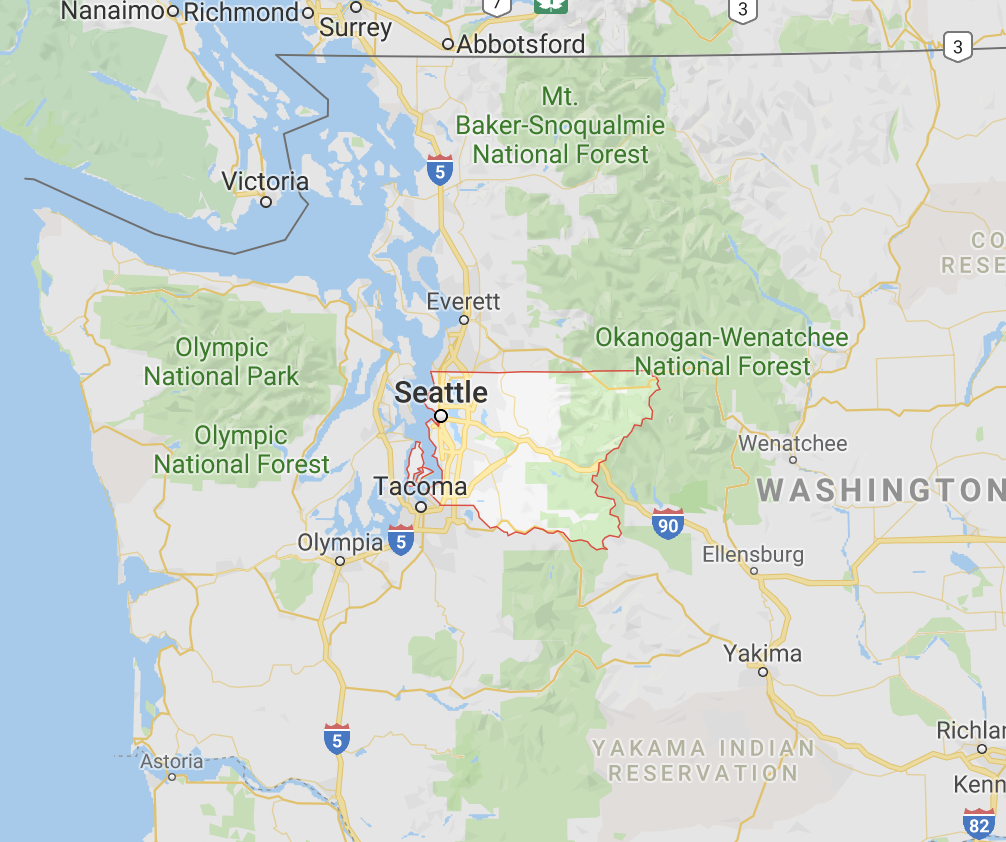

Now let's jump into our data science project using the OSEMiN approach:

# Obtaining the data

The first thing you would do is to import needed libraries - just as many as you need in order to save server storage, which would reduce processing speed.

## Importing Libraries

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# magic function for displaying matplotlib in jupyter notebooks
%matplotlib inline 

import seaborn as sns
import math
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression

## Loading Data and checking out the first rows of data
In the next step we want to load our dataset into a pandas DataFrame and look at the first few rows and all columns in order to get an overview of the data we are dealing with.

In [2]:
# loading data into pandas DataFrame
kc_housing = pd.read_csv('kc_house_data.csv')

# looking at the first 10 data rows
kc_housing.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


Within this overview of the first 10 rows of our dataset we can already see all columns (variables) that are part of our dataset. ALSO: by viewing this short extract we can already see that there are some columns containing Null-Values or weird data that we need to have a closer look on later on:

        yr_renovated (NaN)
        sqft_basement (?)
        waterfront (NaN)
        view (NaN)


At this point I would like to look closer at all columns that are integrated in the dataset. The description came along with the dataset:

    id - unique identifier for a house
    date - Date house was sold
    price - Price is prediction target
    bedrooms - No. of bedrooms per house
    bathrooms - No. of bathrooms per bedroom
    sqft_living - Square footage of the home
    sqft_lot - Square footage of the lot
    floors - Total floors (levels) in the house
    waterfront - House which has a view to a waterfront
    view - has been viewed
    condition - how good is the condition
    grade - overall grade given to the housing unit, based on the King County grading system
    sqft_above - Square footage of house apart from basement
    sqft_basement - Square footage of the basement
    yr_built - Year the house was built
    yr_renovated - Year when house was renovated
    zipcode - zipcode
    lat - latitude coordinate
    long - longitude coordinate
    sqft_living15 - Square footage of interior housing living space for the nearest 15 neighbors
    sqft_lot15 - Square footage of the land lots of the nearest 15 neighbors

What we can see here is that there are 21 variables in the dataset. Based on a quick subjective assumption we will have 'price' as our target (dependent) variable. We could also drop the 'id' variable, since this is not useful to us for this analysis.

## Checking for missing values
In order to check this further we are checking out all missing values for this dataset:

In [3]:
# checking for missing values
kc_housing.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The variable "sqft_basement" is not outlined here since there is a value ('?') within the variable. We will need to take care of this in the scrubbing step of the OSEMiN process.

## Inspecting data types
For further processing and the scrubbing step of the process we need to look at the types of the kc_housing data. Let's do it:

In [4]:
# inspecting data types:
kc_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


From the table above we can see all variables' types. First thing to look at are the "object" variables: 'date' and 'sqft_basement'. In a next step we can transform 'date' to a date-type variable. The variable 'sqft_basement' is currently a string, which is odd. We need to change this variable to becoming a float variable.

There are some variables in the dataset that should be categorized (categorical data). We will keep this is mind for the scrubbing step (one-hot-encoding - creating dummies). The variables are: floors, waterfront, view, condition, grade and zipcode.

### Let's try something fun:
Based on the available variables 'lat' and 'long' we are able to map the houses on a scatter plot and compare it straight to a normal map. This way we could check out where our houses from the dataset are located in King County and also how the location affects the price. Let's try if it works:

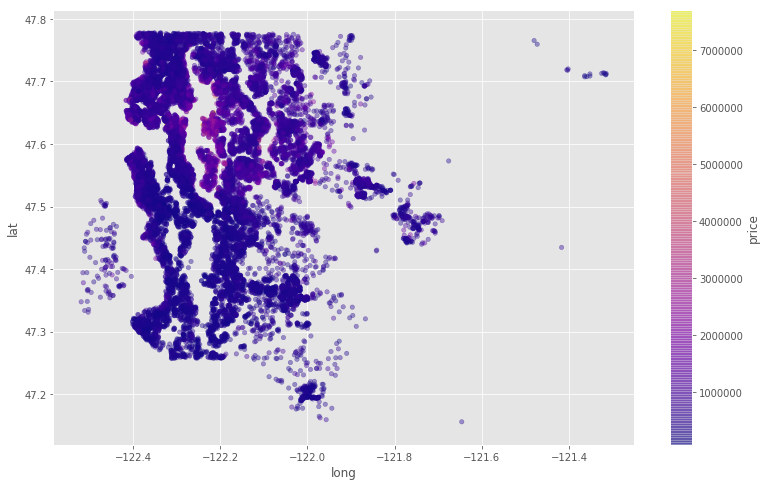

In [5]:
kc_housing.plot(kind='scatter', x='long', y='lat', alpha=.4, figsize=(13,8), c='price', cmap='plasma', colorbar=True, sharey=True, sharex=False);

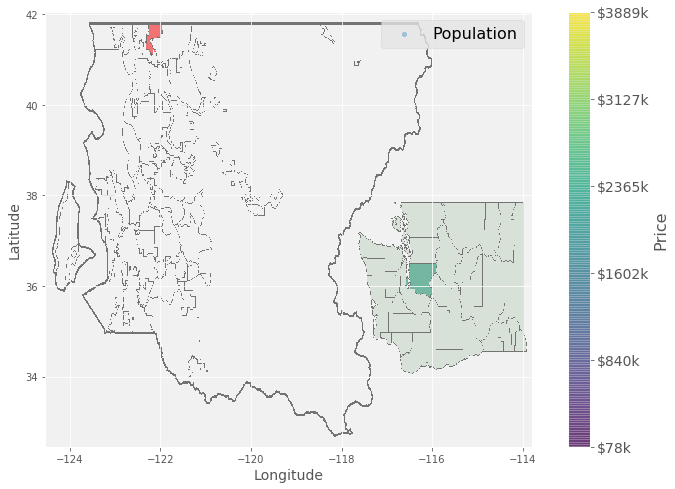

In [6]:
# Trying to put the scatter plot on top of a King County Map:
import matplotlib.image as mpimg
housing_img = mpimg.imread('KC_map3.png')

ax = kc_housing.plot(kind="scatter", x="long", y="lat", figsize=(13,8), label="Population",
                       c="price", cmap='plasma', colorbar=False, alpha=0.4,)
plt.imshow(housing_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = kc_housing["price"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Price', fontsize=16)

plt.legend(fontsize=16)
plt.show()

Unfortunately this has not worked out as it should have - I will come back later and try this again. BUT: Imagine putting our scatter plot on top of the image below we can see that the most expensive houses in our scatter plot (light purple) would be rather located on the waterfront than in the countryside.

As one last step in this section I would like to have some basic description of the kc_housing data. Below we will be looking at basic statistics like mean, median, standard deviation, min, max and the quartiles for all variables.

In [7]:
kc_housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Summary Part 1 - Obtaining our Data

The first step of the process is done! We have gained quite a good look on the data available.

At first we were looking on an extract of the data, where we realized that there are missing and/or odd values inside the following variables:
    - view
    - waterfront
    - yr_renovated
    - sqft_basement

Second we inspected the types and realized that there needs to be some transforming of our variables:
    - Categorical Data: 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode'
    - Float: 'sqft_basement'
    - Date: 'date'

Third we looked at a nice visualization of the locations of the houses in King County and we saw that the most expensive houses are located at the waterfront, which might give us a hint for a potential highly influential predictor for our target variable.

Lastly we looked at some basic statistics like mean, median, standard deviation, min, max and quartiles of our dataset, in order to be fully prepared when we are moving on to the next step: Scrubbing!

# Scrubbing the data
1. Subsampling
2. Dealing with datatypes
3. Detecing & Dealing with Null Values (NaN)
4. Checking for Multicollinearity
5. Normalizing our data
6. One-Hot-Encoding Categorical Data (maybe postpone it to right before modeling)

## 1. Subsampling
I would not go for a subset here, as this dataset is not as big as it can be

## 2. Dealing with datatypes
#### - Transforming 'date' (we might not need this variable later on, but I am still transforming it!)

In [8]:
kc_housing.date = pd.to_datetime(kc_housing.date)

#### - Transforming 'sqft_basement' to a float variable
As we have seen in our first overview of the dataset, there are some weird values ('?') in the 'sqft_basement' column. We would like to check this out in more detail and therefore want to look at the unique values of this variabel:

In [9]:
# Looking at unique values:
kc_housing.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [10]:
kc_housing.sqft_basement.value_counts()[:5]

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

Here we can see that there 454 rows of data where there is a '?' as the value for sqft_basement! This might also cause the fact that this variable is currently stored as a string and not as an integer like the 'sqft_above' variable.
Now it is time for our first real replacement - we are now reaplcing the '?' with a value that makes sense. Obvisouly there are 12826 houses with 0.0 basement sqft, which is most likely to mean that there is no basement for this house. In order to simplify this here I would replace the '?' with 0.0 as well.
Alternatively we could also use a mean here, but I am currently not doing so.

In [11]:
# replacing '?' with 0.0 (or 0) and storing it as an integer
kc_housing.sqft_basement = kc_housing.sqft_basement.replace('?', 0).astype('float')
kc_housing.sqft_basement = kc_housing.sqft_basement.astype('int')

In [12]:
# Checking for value counts again
kc_housing.sqft_basement.value_counts()[:5]

0      13280
600      217
500      209
700      208
800      201
Name: sqft_basement, dtype: int64

In [13]:
# Checking for datatype 'sqft_basement'
kc_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(12)
memory usage: 3.5 M

As we can see above the '?' values have now been added to the '0,0' value.
Also we can see that the 'sqft_basement' variable is now stored as an integer!
We have now dealt with 'date' and 'sqft_basement' and are now moving on to our categorical data.

#### - Checking for categorical data types
In this step we will be having a closer look at some of our variables that we have previously thought of as potential categorical variables.
For the modeling step where we will be modeling the linear regression we will need dummy variables for our categorical variables. 
However for the next step (exploring our data) it is better to work with string coding of these variables.
We are for now checking whether our assumptions about the datatypes are correct and will keep the results in mind for our one-hot-encoding right before modeling.

In [14]:
print('Unique Values Floors:', kc_housing.floors.unique())
print('Unique Values Waterfront:',kc_housing.waterfront.unique())
print('Unique Values View:',kc_housing.view.unique())
print('Unique Values Condition:',kc_housing.condition.unique())
print('Unique Values Grade:',kc_housing.grade.unique())
print('Unique Values Zipcode:',kc_housing.zipcode.unique())

Unique Values Floors: [1.  2.  1.5 3.  2.5 3.5]
Unique Values Waterfront: [nan  0.  1.]
Unique Values View: [ 0. nan  3.  4.  2.  1.]
Unique Values Condition: [3 5 4 1 2]
Unique Values Grade: [ 7  6  8 11  9  5 10 12  4  3 13]
Unique Values Zipcode: [98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039]


Going through the results from top to bottom we can see that the variable 'floors' has 6 values, meaning that we could put this in categories, BUT this could also be seen as a linear relationship. Meaning 3.5 floors is better (more expensive) than 1 floor! So I would recommend not putting this into a categorical variable.

The 'waterfront' variable can only take 2 values (0 or 1) and therefore absolutely is a categorical variable. Let's transform our 'waterfront' variable to a string variable:


In [15]:
kc_housing.waterfront = kc_housing.waterfront.astype('str')
print(kc_housing.waterfront.value_counts())

0.0    19075
nan     2376
1.0      146
Name: waterfront, dtype: int64


The 'view' variable is a bit tricky. First of all there are still some missing values! Also I think it is better to store this variable as an integer, since I am assuming that there is a linear relationship within this variable, meaning that the more views a house hat the more/less the house is priced.
Let's first deal with the missing values and then transform this variable to be an integer:

In [16]:
print(kc_housing.view.value_counts())
print('How many missing values are there in the variable?')
print(kc_housing.view.isna().sum())

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
How many missing values are there in the variable?
63


We could now either take the mean or replace the 63 missing values with 0. Since 63 values are not that many rows compared to the total number I would for now suggest to replace the NaNs with the value 0.

In [17]:
kc_housing.view.fillna(0, inplace=True)

print('How many missing values are there in the variable?')
print(kc_housing.view.isna().sum())

How many missing values are there in the variable?
0


In [18]:
# and now we are going to transform this variable to an integer
kc_housing.view = kc_housing.view.astype('int')

The 'condition' variable takes on the values from 1 to 5 and can therefore be stored in a categorical variable - but first in a string variable (like we did with 'waterfront'). Let's do this right now:

In [19]:
kc_housing.condition = kc_housing.condition.astype('str')

For 'grade' variable it is the same thing. We can store this one in a string as well and put it into a categorical variable right before modeling:

In [20]:
kc_housing.grade = kc_housing.grade.astype('str')

The last variable in our overview 'zipcode' seems to be a quite big list. When we will transform this one first to a string and later on to a categorical variable we will have a lot of extra columns. Nevertheless I would do so for now, since zipcodes are no integers in my opinion:

In [21]:
kc_housing.zipcode = kc_housing.zipcode.astype('str')

One more thing tat I realized now is the type of the 'yr_renovated' variable. There we also have some missing values, but also this variably has another type than the sister variable 'yr_built'. This is why I would like to transform the variable to an integer. 
Within this variable there are NaNs as well as 0 values. I assume that this is the same thing and that these values let us know that a house has never been renovated ever! Therefore I will replace all NaNs with 0 before I will transform the variable to an integer.

In [22]:
kc_housing.yr_renovated.fillna(0, inplace=True)
print('How many missing values are there in the variable?')
print(kc_housing.yr_renovated.isna().sum())

How many missing values are there in the variable?
0


In [23]:
# and now we are going to transform this variable to an integer
kc_housing.yr_renovated = kc_housing.yr_renovated.astype('int')

As a last step in this section of our data scrubbing I would like to look at all datatypes again:

In [24]:
kc_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null int64
condition        21597 non-null object
grade            21597 non-null object
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(11), object(4)
memory usa

I would assume this looks good for now. Let's move on to check out if we have any missing values left!

## 3. Detecing & Dealing with Null Values (NaN)

In order to deal with remaining null values we first need to detect them.

In [25]:
kc_housing.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

As far as I can see we are already good to go here! :)

## 4. Checking for Multicollinearity
Checking for multicollinearity means to check for correlations between 3 or more variables. In order for our future model to work we want all our indepent variables (our predictor variables) to really be independent. Simply put we do not want any of our predictor variables to be predicted by another predictor variable :) See - EASY!

Since we only want to check multicollinearity between our independent variables I will leave our our target variable price!

In [26]:
kc_housing_predictors = kc_housing.iloc[:,3:]
kc_housing_target = kc_housing.iloc[:,2:3]

print(kc_housing_predictors.head(1))
print(kc_housing_target.head(1))

   bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  view  \
0         3        1.0         1180      5650     1.0        nan     0   

  condition grade  sqft_above  sqft_basement  yr_built  yr_renovated zipcode  \
0         3     7        1180              0      1955             0   98178   

       lat     long  sqft_living15  sqft_lot15  
0  47.5112 -122.257           1340        5650  
      price
0  221900.0


In [27]:
# let's check out a respective correlation matrix with the predictors' coefficients.
kc_housing_predictors.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,0.078354,0.479386,0.297229,0.155670,0.017900,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.186016,0.686668,0.278485,0.507173,0.047177,0.024280,0.224903,0.569884,0.088303
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.281715,0.876448,0.428660,0.318152,0.051060,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.075054,0.184139,0.015031,0.052946,0.004979,-0.085514,0.230227,0.144763,0.718204
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.028414,0.523989,-0.241866,0.489193,0.003793,0.049239,0.125943,0.280102,-0.010722
view,0.078354,0.186016,0.281715,0.075054,0.028414,1.000000,0.166017,0.270629,-0.054452,0.090339,0.006321,-0.077702,0.278928,0.073083
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,0.166017,1.000000,-0.051175,0.424037,0.020645,-0.001199,0.344842,0.731767,0.195077
sqft_basement,0.297229,0.278485,0.428660,0.015031,-0.241866,0.270629,-0.051175,1.000000,-0.130085,0.065008,0.109853,-0.142369,0.199288,0.015885
yr_built,0.155670,0.507173,0.318152,0.052946,0.489193,-0.054452,0.424037,-0.130085,1.000000,-0.202555,-0.148370,0.409993,0.326377,0.070777
yr_renovated,0.017900,0.047177,0.051060,0.004979,0.003793,0.090339,0.020645,0.065008,-0.202555,1.000000,0.027970,-0.064543,0.000683,0.004286


We can see above that there are values ranging from -1 to 1, which is normal for all correlation coefficients. Basically we can say that a correlation coefficient higher than 0.75 is a pretty good predictor that the two variables correlate. In order to have a better look at this, let's transform the table to a boolean view:

In [28]:
abs(kc_housing_predictors.corr() > 0.75)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,True,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,True,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,False,True,False,False,False,False


$True$ here means that the correlation coefficient is higher than 0.75 and $False$ means the opposite! 
We can see from the table that there are variables that highly correlate with each other:
- bathrooms (with sqft_living)
- sqft_living (with sqft_living, bathrooms, sqft_above & sqft_living15)
- sqft_living15 (with sqft_living)
- sqft_above (with sqft_living)

All of the above are strongly correlating 'with sqft-living'! Which is why I need to think about dropping this column entirely1
Very important to note here is that this is only done for positive values. In order to also get a glimpse on the negatively correlated variables we are using a more simple tool to display the correlations.

Let's try an even more simple visualization of correlated predictor variables with a heatmap:

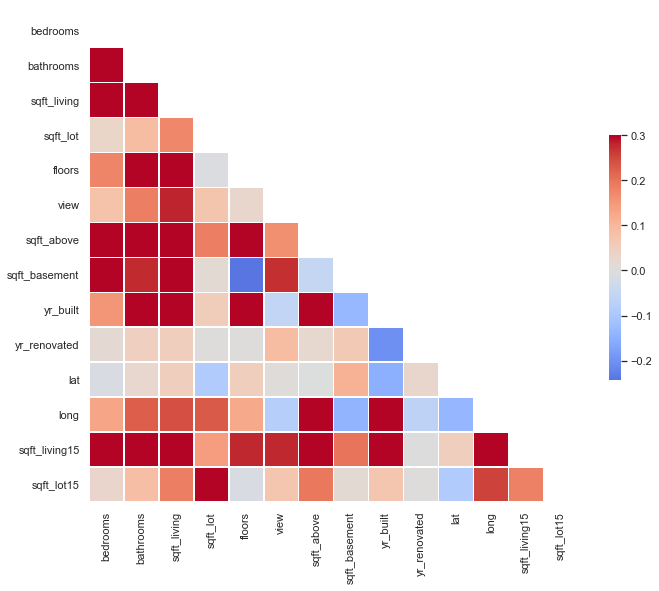

In [29]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = kc_housing_predictors.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0, square=True, linewidth=.5, cbar_kws={'shrink': .5})

Since 'sqft_living' is clearly correlated to some of the variables I would like to try dropping the variable and check for multicollinearity again.

In [30]:
# let's create a function for dropping columns:
def drop_cols(columns, df):
    return df.drop(columns, axis=1, inplace=True)

drop_cols(['sqft_living'], kc_housing)
kc_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,5650,1.0,nan,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,7242,2.0,0.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,10000,1.0,0.0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,5000,1.0,0.0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,8080,1.0,0.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
kc_housing_predictors = kc_housing.iloc[:,3:]
kc_housing_predictors.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,5650,1.0,nan,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,7242,2.0,0.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,10000,1.0,0.0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,5000,1.0,0.0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,8080,1.0,0.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
abs(kc_housing_predictors.corr() > 0.75)

,bedrooms,bathrooms,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,True,False,False,False,False,False,False,False,False,False
view,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_above,False,False,False,False,False,True,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,True,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,True,False,False,False,False
lat,False,False,False,False,False,False,False,False,False,True,False,False,False


Looks pretty perfect now :)

## 6. NOT One-Hot-Encoding BUT removing some columns that we do not need
There are some columns that seem to be obsolute for further exploration of the data. Let's remove them with the previously formed function drop_cols:

In [33]:
drop_cols(['id', 'date', 'zipcode', 'lat', 'long'], kc_housing)
kc_housing.head(1)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.0,5650,1.0,nan,0,3,7,1180,0,1955,0,1340,5650


Now we have only 15 columns left

## Summary - Part 2 Scrubbing our data

The second part of this project respectively of the data science process was to scrub/clean the data as good as possible. 
We have first checked out all datatypes and transformed the following variables:
- 'date' to datetime
- 'sqft_basement' to float64 (while replacing the odd value '?' with 0
- 'waterfront' to string (object)
- 'view' to int64 (while replacing NaNs with 0)
- 'condition' to string (object)
- 'grade' to string (object)
- 'zipcode' to string (object)
- 'yr_renovated' to int64 (while replacing NaNs with 0)

Second we have checked for remaining missing values but they were all dealt with in the first step already.

Third, we checked for multicollinearity and we found out that there is one variable correlated to some other variables, which is why we dropped this variable/column in order to have all remaining variables independent from another.
- sqft_living

Forth, we standardized all our numeric datatypes in order for our data to be equally scaled.

Last, but not least I decided to drop some more columns, which we won't need in our further analysis. The last step of scrubbing the data would actually be to hot-encode the categorical data but I would like to postpone this to right before modeling so my data will not get mixed up while exploring it.

Let's move on to the exploration of our cleaned up dataset.

# Exploring our data
When it comes to exploring our dataset we would like to know more about our variables, how they are distributed and we may also already gain some findings about relationships between variables.
In order to better understand these observations we are using some visualizations in this step.

In order to follow a bit of process within this step as well, I am trying to adhere to the steps that we did at Learn.Co, which are the following:
- Understanding the data
- Visualizing the distributions of our data via histograms
- Visulizing the distribution of our data via Kernel-Density-Estimation (KDE) plots
- Visualizing our variables with the help of boxplots
- Dealing with outliers (removing)
- Using joint plots to gain some insights about our target variable and the influence on it from our predictors
- Creating dummy variables for categorical variables
- Normalizing/transforming continuous variables

### Understanding the data

In order to fully explore/understand our data we need to check how our data is distributed. One assumption that is made when dealing with linear regression is that our data is normally distributed. If this is not the case by now, we might need some more preprocessing of the data before we actually fit our model.
Let's start by looking at the basic statistics of our remaining dataset again:

In [34]:
kc_housing.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,1.509941e+04,1.494096,0.233181,1788.596842,285.716581,1970.999676,68.758207,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,4.141264e+04,0.539683,0.764673,827.759761,439.819830,29.375234,364.037499,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,5.200000e+02,1.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,5.040000e+03,1.000000,0.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,7.618000e+03,1.500000,0.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,1.068500e+04,2.000000,0.000000,2210.000000,550.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,1.651359e+06,3.500000,4.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


Since we have not yet normalized/transformed our data this table is really nice to read since we can still use the actual amounts to talk about real-life values!

Next we will look at our 5 first rows of our data set again:

In [35]:
kc_housing.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,5650,1.0,nan,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,7242,2.0,0.0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,10000,1.0,0.0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,5000,1.0,0.0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,8080,1.0,0.0,0,3,8,1680,0,1987,0,1800,7503


In [36]:
kc_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null int64
condition        21597 non-null object
grade            21597 non-null object
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(3), int64(9), object(3)
memory usage: 2.5+ MB


All this information has already been covered in the last fest steps of the data science process. Now we want to gain a deeper look on how our variables are distributed. For this we will look at pandas histogram plotting for all variables:

### Visualizing the distribution of our data via histograms

Let's look at all our continuous variables in the form of histograms. It will give us a quick overview on the distribution of our variables, which is really important for our model, since we only want to include normally distributen data in order for our model predict our outcome the best way possible.

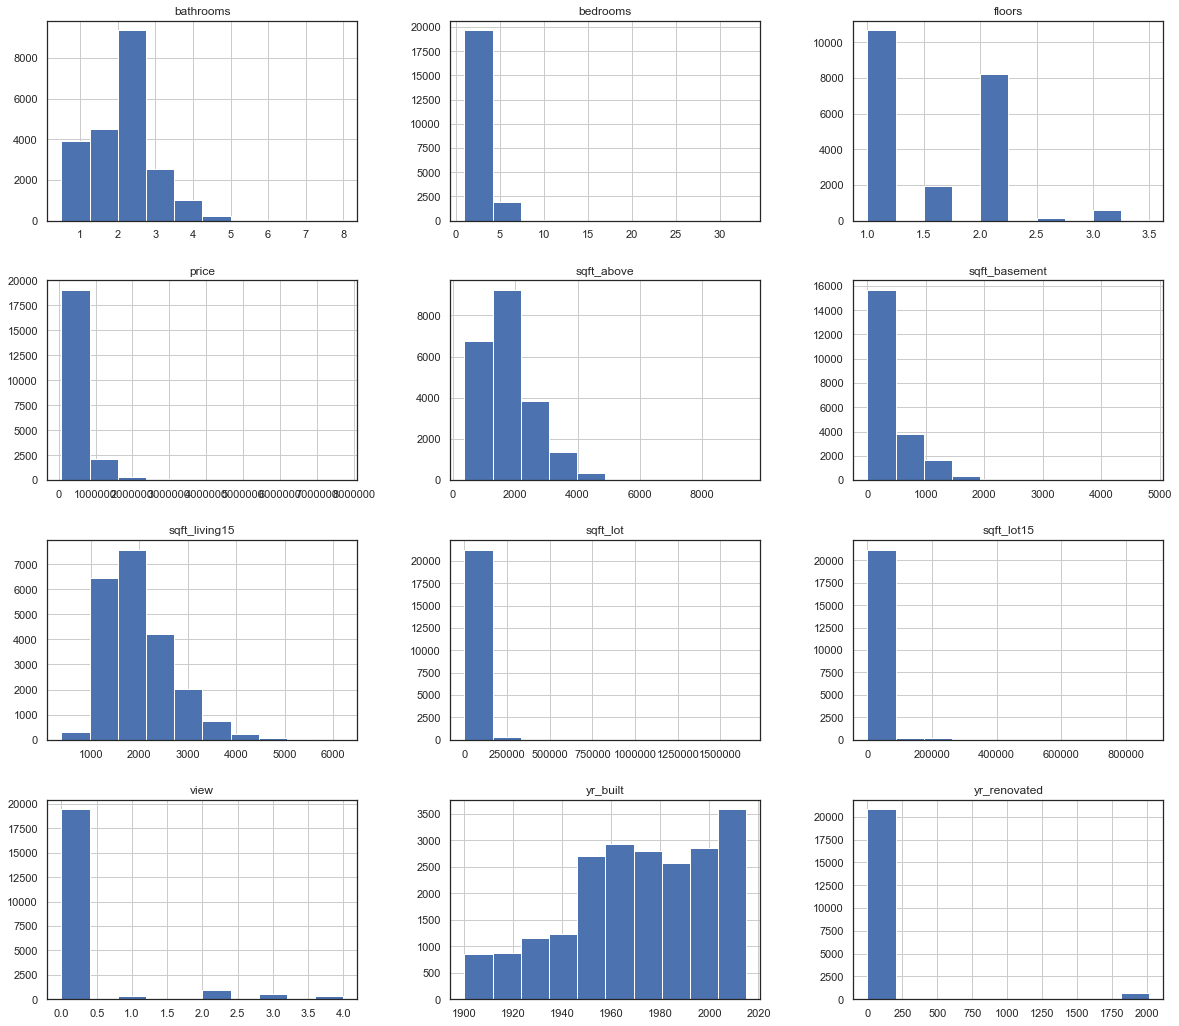

In [37]:
kc_housing.hist(figsize=(20,18));

What we can see here is, that there is NO variable normally distributed - there is rather a lot of skewness visible. Currently we do not know why this is the case - it may be caused by several outliers etc. So now we need to dig a bit deeper. First we will try to confirm these findings via KDE plots and later on we will try to deal with the distribution issues by removing outliers and transforming continous variables.

### Visualizing the distribution of our data via Kernel-Density-Estimation (KDE) plots

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


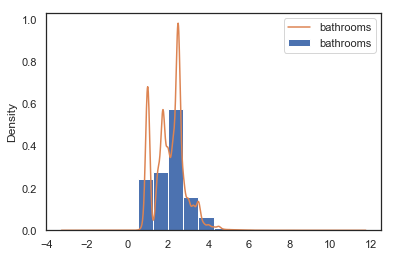

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


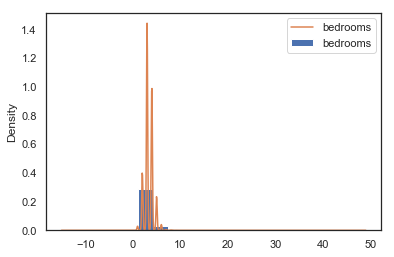

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


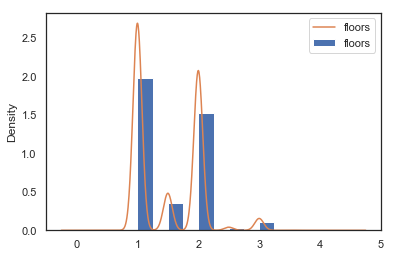

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


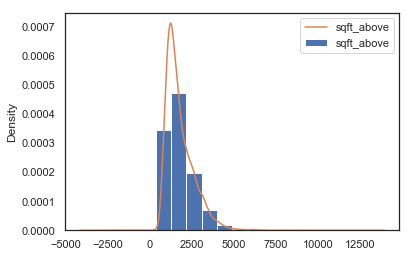

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


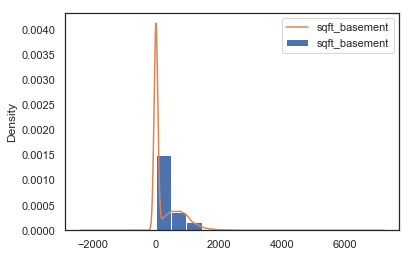

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


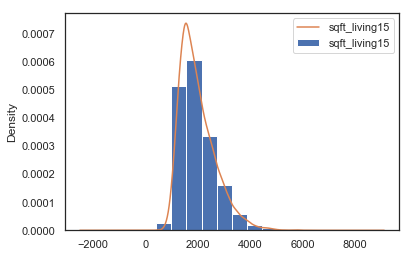

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


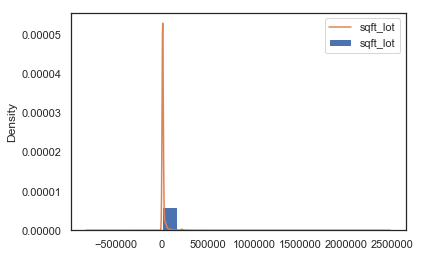

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


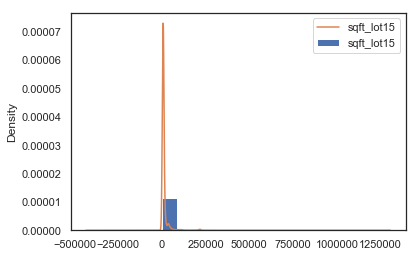

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


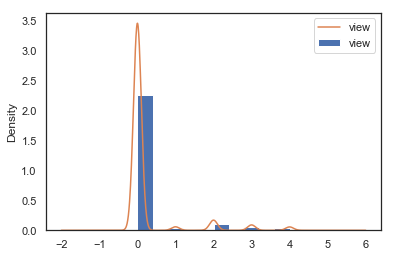

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


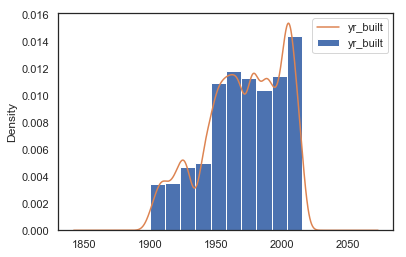

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


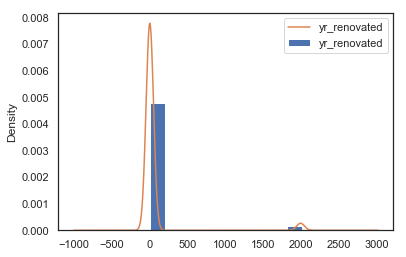

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


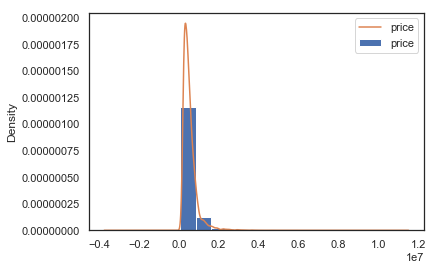

In [38]:
for column in ['bathrooms', 'bedrooms', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 'yr_built', 'yr_renovated', 'price']:
    kc_housing[column].plot.hist(normed=True)
    kc_housing[column].plot.kde(label=column)
    plt.legend()
    plt.show()

### Visualizing our variables with the help of boxplots

In order to check our data for outliers, we need to be more precise when it comes to visualizing the respective variables. Boxplots can be of huge help in that matter, since they are showing all quartiles, the mean and also the outliers of a variable (shown as dots in the graph). 

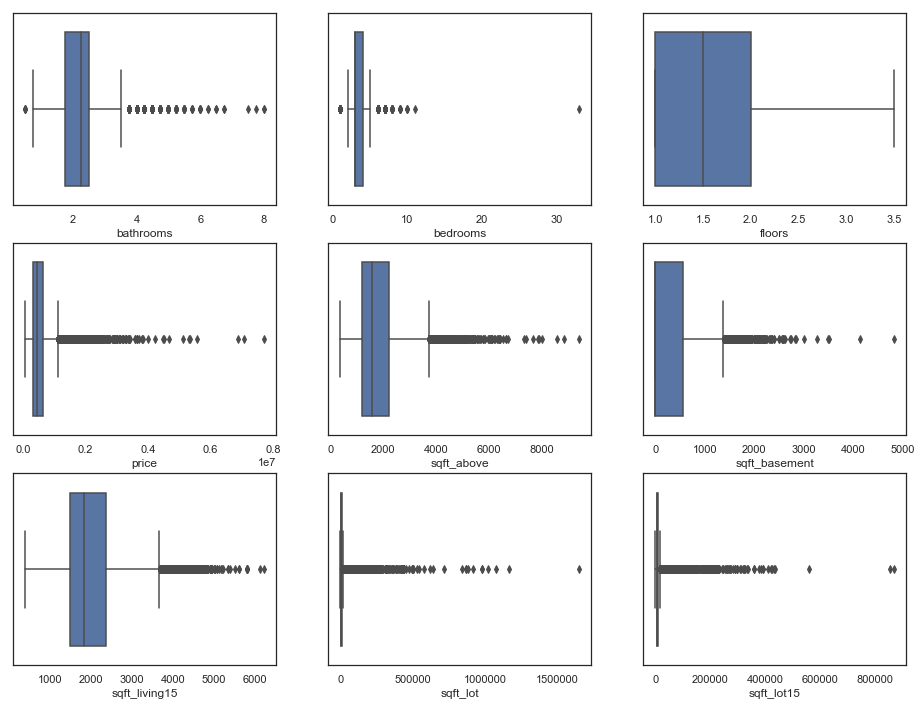

In [39]:
plt.figure(figsize=(16,12))
plt.subplot(331)
sns.boxplot(kc_housing.bathrooms)
plt.subplot(332)
sns.boxplot(kc_housing.bedrooms)
plt.subplot(333)
sns.boxplot(kc_housing.floors)
plt.subplot(334)
sns.boxplot(kc_housing.price)
plt.subplot(335)
sns.boxplot(kc_housing.sqft_above)
plt.subplot(336)
sns.boxplot(kc_housing.sqft_basement)
plt.subplot(337)
sns.boxplot(kc_housing.sqft_living15)
plt.subplot(338)
sns.boxplot(kc_housing.sqft_lot)
plt.subplot(339)
sns.boxplot(kc_housing.sqft_lot15)

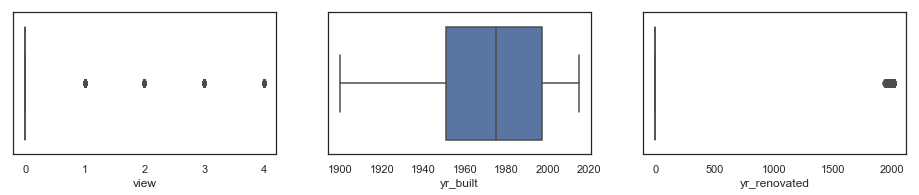

In [40]:
plt.figure(figsize=(16,12))
plt.subplot(431)
sns.boxplot(kc_housing.view)
plt.subplot(432)
sns.boxplot(kc_housing.yr_built)
plt.subplot(433)
sns.boxplot(kc_housing.yr_renovated)

What's clear here is that we may adjust our datatypes for both variables 'view' and yr_renovated again.
Let's first out our variable 'view' into a string variable so we can later transform it to a dummy variable:

In [41]:
kc_housing.view = kc_housing.view.astype('str')
print(kc_housing.view.value_counts())

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64


Next we have to handle the variable 'yr_renovated'. It seems like there have been some renovations lately - but maybe it would be easier to transform this variable into a categorical variable as well, meaning that we check if a house was renovated before/after a specific date and leave the rest as the house hasn't been renovated:

In [42]:
# Let's do some binning for the years that houses were renovated in:
bins = [0., 1950., 1980., 1990., 2000., 2015.]
names = ['never', 'before 1980', '1980-1989', '1990-1999', '2000-2015']
kc_housing['yr_renovated_cat'] = pd.cut(kc_housing['yr_renovated'], bins, labels=names, right=False)

print('Unique Values')
print(kc_housing.yr_renovated_cat.unique())
print('Value Counts')
print(kc_housing.yr_renovated_cat.value_counts())

Unique Values
[never, 1990-1999, 2000-2015, before 1980, 1980-1989, NaN]
Categories (5, object): [never < before 1980 < 1980-1989 < 1990-1999 < 2000-2015]
Value Counts
never          20862
2000-2015        365
1990-1999        143
1980-1989        124
before 1980       89
Name: yr_renovated_cat, dtype: int64


As far as I remember, there were also still some missing values?! Let's check:

In [43]:
kc_housing.yr_renovated_cat.isna().sum()

14

Let's put those into the category "Never":

In [44]:
kc_housing.yr_renovated_cat.fillna('never', inplace=True)
print('Value Counts')
print(kc_housing.yr_renovated_cat.value_counts())

Value Counts
never          20876
2000-2015        365
1990-1999        143
1980-1989        124
before 1980       89
Name: yr_renovated_cat, dtype: int64


Now, we just need to transform this variable into a category variable:

In [45]:
kc_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
price               21597 non-null float64
bedrooms            21597 non-null int64
bathrooms           21597 non-null float64
sqft_lot            21597 non-null int64
floors              21597 non-null float64
waterfront          21597 non-null object
view                21597 non-null object
condition           21597 non-null object
grade               21597 non-null object
sqft_above          21597 non-null int64
sqft_basement       21597 non-null int64
yr_built            21597 non-null int64
yr_renovated        21597 non-null int64
sqft_living15       21597 non-null int64
sqft_lot15          21597 non-null int64
yr_renovated_cat    21597 non-null category
dtypes: category(1), float64(3), int64(8), object(4)
memory usage: 2.5+ MB


### Dealing with outliers

Now it is time to get rid of our outliers, where we hope to reach a distribution that is more normal than before. The decision to remove certain outliers is based on the boxplots we have seen above!

In [46]:
# Code here
print('Original dataset:',len(kc_housing))
# Removing outliers from dataset
kc_housing = kc_housing[kc_housing.bathrooms < 4]
kc_housing = kc_housing[kc_housing.bedrooms < 5]
kc_housing = kc_housing[kc_housing.price < 4000000]
kc_housing = kc_housing[kc_housing.sqft_above < 7000]
kc_housing = kc_housing[kc_housing.sqft_basement < 3000]
kc_housing = kc_housing[kc_housing.sqft_living15 < 5500]
kc_housing = kc_housing[kc_housing.sqft_lot < 500000]
kc_housing = kc_housing[kc_housing.sqft_lot15 < 400000]
print('After removing outliers:',len(kc_housing))

Original dataset: 21597
After removing outliers: 19460


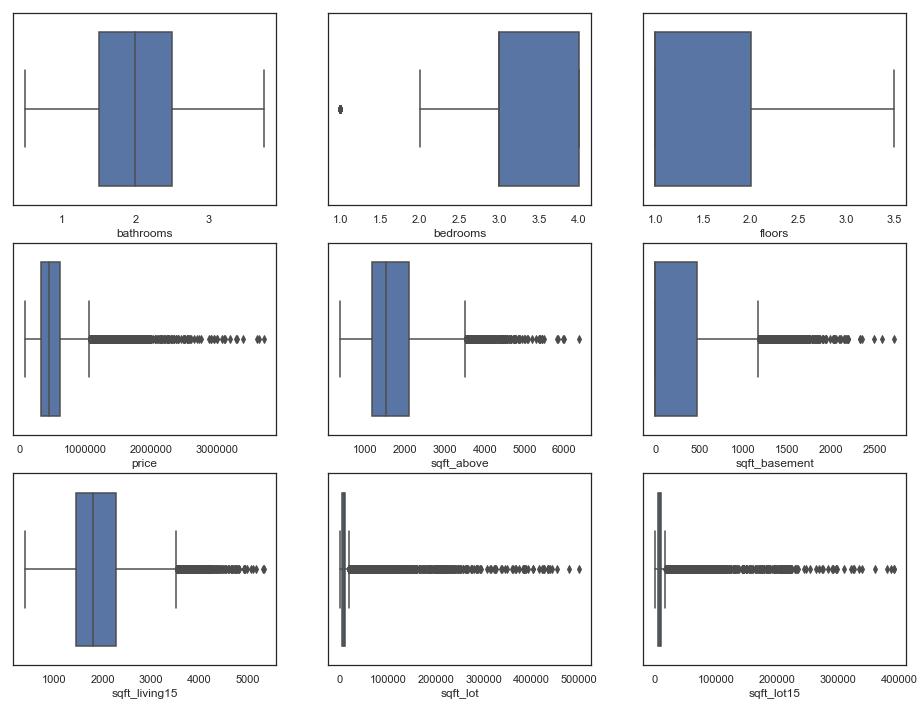

In [47]:
plt.figure(figsize=(16,12))
plt.subplot(331)
sns.boxplot(kc_housing.bathrooms)
plt.subplot(332)
sns.boxplot(kc_housing.bedrooms)
plt.subplot(333)
sns.boxplot(kc_housing.floors)
plt.subplot(334)
sns.boxplot(kc_housing.price)
plt.subplot(335)
sns.boxplot(kc_housing.sqft_above)
plt.subplot(336)
sns.boxplot(kc_housing.sqft_basement)
plt.subplot(337)
sns.boxplot(kc_housing.sqft_living15)
plt.subplot(338)
sns.boxplot(kc_housing.sqft_lot)
plt.subplot(339)
sns.boxplot(kc_housing.sqft_lot15)

### Using joint plots to gain some insights about our target variable and the influence on it from our predictors

Now, that we have done a lot of preprocessing, we would like to check out some relationships between our feature variables and our target variable 'price'. We would like to do so by checking out joint plots that show us a scatter plot with a regression line, and a histogram incl. the kde plot alltogether. Isn't that awesome???
Let's go ahead:

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


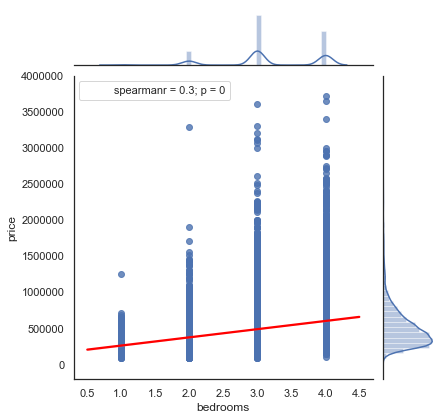

In [48]:
import scipy.stats as stats
from scipy.stats import spearmanr
sns.jointplot(x='bedrooms', y='price', data=kc_housing, stat_func=spearmanr, kind='reg', label='bedrooms', joint_kws={'line_kws':{'color':'red'}})
plt.show()

Based on this joint plot, it might make more sense to handle bedrooms as a categorical variable.
We will transform this one at a later stage, when transforming all category variables to dummy variables.

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


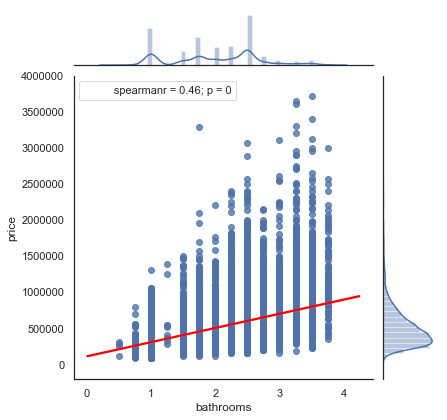

In [49]:
sns.jointplot(x='bathrooms', y='price', data=kc_housing, stat_func=spearmanr, kind='reg', label='bathrooms', joint_kws={'line_kws':{'color':'red'}})
plt.show()

Same here: Based on this joint plot, it might make more sense to handle bathrooms as a categorical variable.
We will transform this one at a later stage, when transforming all category variables to dummy variables.

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


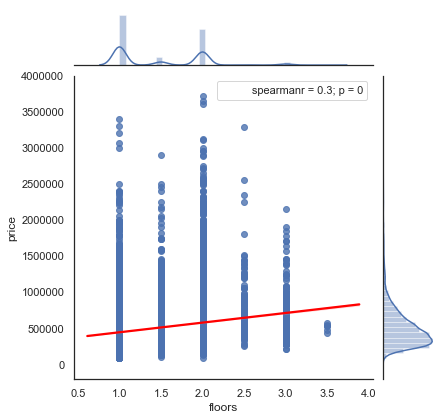

In [50]:
sns.jointplot(x='floors', y='price', data=kc_housing, stat_func=spearmanr, kind='reg', label='floors', joint_kws={'line_kws':{'color':'red'}})
plt.show()

And same here: Based on this joint plot, it might make more sense to handle floors as a categorical variable.
We will transform this one at a later stage, when transforming all category variables to dummy variables.

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


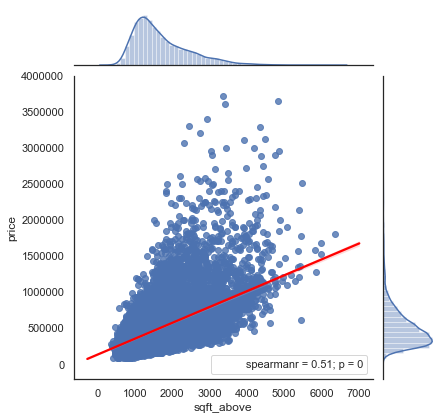

In [51]:
sns.jointplot(x='sqft_above', y='price', data=kc_housing, stat_func=spearmanr, kind='reg', label='sqft_above', joint_kws={'line_kws':{'color':'red'}})
plt.show()

This basically shows us THE PERFECT joint plot that we are craving to reach :) 
Maybe not 100% perfect, but this is the shape we are looking for. We can see here the cone shape as well as a positive facing red regression line, meaning that there is indeed a positive relationship between 'sqft_above' and the target variable 'price'.

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


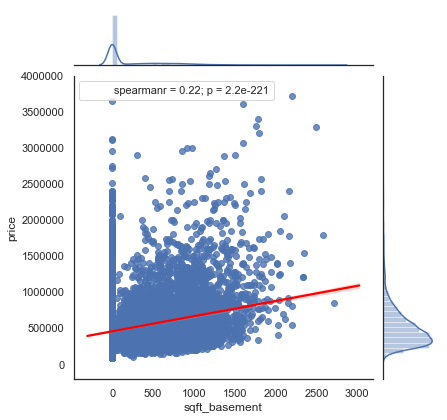

In [52]:
sns.jointplot(x='sqft_basement', y='price', data=kc_housing, stat_func=spearmanr, kind='reg', label='sqft_basement', joint_kws={'line_kws':{'color':'red'}})
plt.show()

Here it is similar to the visualization above, BUT there is one additional finding:
It seems like the value 0 of our variable 'sqft_basement' could be put in a separate variable (making the variable a categorical one). There seem to be a lot of houses without a basement. We are for now sticking with the datatype as it is, but may change it later on to improve the model fit.

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


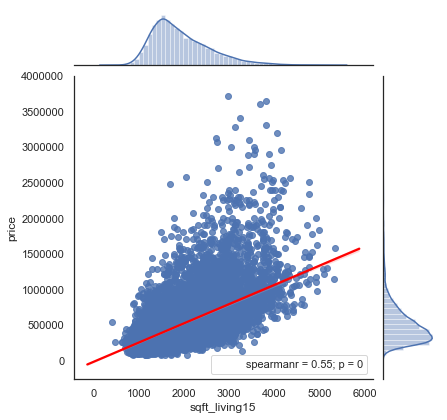

In [53]:
sns.jointplot(x='sqft_living15', y='price', data=kc_housing, stat_func=spearmanr, kind='reg', label='sqft_living15', joint_kws={'line_kws':{'color':'red'}})
plt.show()

Like the two joint plots before we have a rather cone-shaped graph here as well with a positive relationship meaning that there is a positive relationship between 'sqft_living15' and 'price'.

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


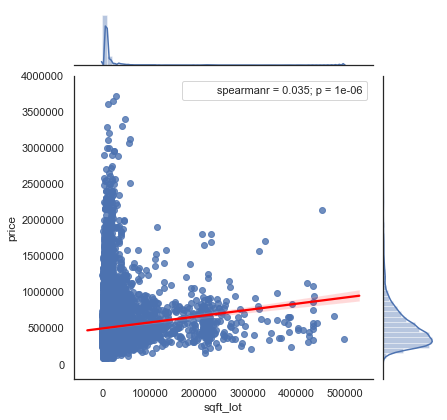

In [54]:
sns.jointplot(x='sqft_lot', y='price', data=kc_housing, stat_func=spearmanr, kind='reg', label='sqft_lot', joint_kws={'line_kws':{'color':'red'}})
plt.show()

This joint plot is not as obviously shaped but still the plot was able to draw a red line in it and it is positive, showing us that also here seems to be a positive relationship between 'sqft_lot' and 'price'.

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


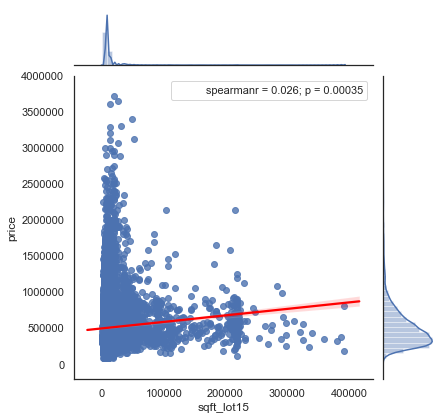

In [55]:
sns.jointplot(x='sqft_lot15', y='price', data=kc_housing, stat_func=spearmanr, kind='reg', label='sqft_lot15', joint_kws={'line_kws':{'color':'red'}})
plt.show()

And the same goes for 'sqft_lot15'

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


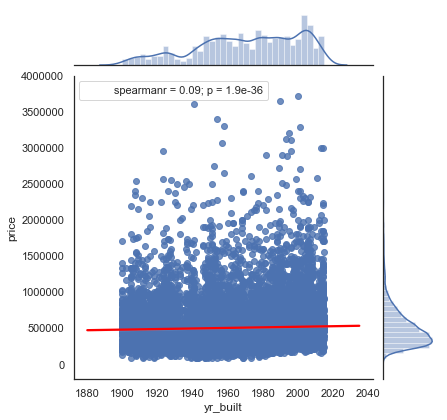

In [56]:
sns.jointplot(x='yr_built', y='price', data=kc_housing, stat_func=spearmanr, kind='reg', label='yr_built', joint_kws={'line_kws':{'color':'red'}})
plt.show()

This joint plot however shows a complete different story. Just by looking at the graph itself it seems like there are slight more dots on the upper right side, meaning that the newer a house is the more expensive it is.
We also have a red regression line inside of the graph which (well, I think) goes up a little, meaning that we also have here an obvious positive relationship between 'yr_built' and 'price'.

### Creating dummy variables for categorical variables

In order for our model to properly work we need to transform our categorical data to dummy variables. We are kind of assigning new variables to the values a variable can take. 

In [57]:
# Let's transform all our string variables (that we had for better visualizations) into categorical datatypes:
kc_housing.waterfront = kc_housing.waterfront.astype('category')
kc_housing.view = kc_housing.view.astype('category')
kc_housing.condition = kc_housing.condition.astype('category')
kc_housing.grade = kc_housing.grade.astype('category')
kc_housing.floors = kc_housing.floors.astype('category')
kc_housing.bathrooms = kc_housing.bathrooms.astype('category')
kc_housing.bedrooms = kc_housing.bedrooms.astype('category')

In [58]:
# Transforming the category variable to dummy variables:
waterfront = pd.get_dummies(kc_housing.waterfront, prefix='waterfront', drop_first=True)
view = pd.get_dummies(kc_housing.view, prefix='view', drop_first=True)
condition = pd.get_dummies(kc_housing.condition, prefix='condition', drop_first=True)
grade = pd.get_dummies(kc_housing.grade, prefix='grade', drop_first=True)
yr_renovated_cat = pd.get_dummies(kc_housing.yr_renovated_cat, prefix='yr_renovated_cat', drop_first=True)
floors = pd.get_dummies(kc_housing.floors, prefix='floors', drop_first=True)
bathrooms = pd.get_dummies(kc_housing.bathrooms, prefix='bathrooms', drop_first=True)
bedrooms = pd.get_dummies(kc_housing.bedrooms, prefix='bedrooms', drop_first=True)

In [59]:
# Adding the dummies to the dataset and deleting the 'old'/original variables
kc_housing = kc_housing.join([waterfront, view, condition, grade, yr_renovated_cat, floors, bathrooms, bedrooms])
kc_housing.drop(['waterfront','view','condition','grade','yr_renovated_cat','floors', 'bathrooms', 'bedrooms'], axis=1, inplace=True)

In [60]:
kc_housing.head()

,price,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,waterfront_1.0,waterfront_nan,...,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bedrooms_2,bedrooms_3,bedrooms_4
0,221900.0,5650,1180,0,1955,0,1340,5650,0,1,...,0,0,0,0,0,0,0,0,1,0
1,538000.0,7242,2170,400,1951,1991,1690,7639,0,0,...,1,0,0,0,0,0,0,0,1,0
2,180000.0,10000,770,0,1933,0,2720,8062,0,0,...,0,0,0,0,0,0,0,1,0,0
3,604000.0,5000,1050,910,1965,0,1360,5000,0,0,...,0,0,0,1,0,0,0,0,0,1
4,510000.0,8080,1680,0,1987,0,1800,7503,0,0,...,0,0,0,0,0,0,0,0,1,0


### Normalizing/transforming continuous variables
In order for our model to work perfectly we want our columns to all share the same scale! This is done via normalizing the data. Therefore we will be converting each value in our numeric variable to its corresponding z-value. We are doing so by standardizing the values like that:
Subtracting the mean and dividing it by the standard deviation. 
The following variables are numeric and should therefore be standardized:
- price
- sqft_above
- sqft_basement
- yr_built
- sqft_living15
- sqft_lot15
- sqft_lot

Let's have a look:

Before transforming:

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


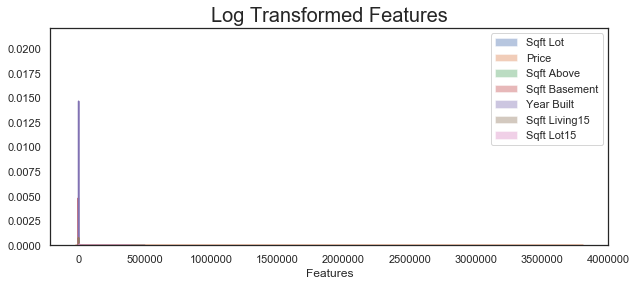

In [61]:
plt.figure(figsize=(10,4))
sns.distplot(kc_housing.sqft_lot, label='Sqft Lot')
sns.distplot(kc_housing.price, label='Price')
sns.distplot(kc_housing.sqft_above, label='Sqft Above')
sns.distplot(kc_housing.sqft_basement, label='Sqft Basement')
sns.distplot(kc_housing.yr_built, label='Year Built')
sns.distplot(kc_housing.sqft_living15, label='Sqft Living15')
sns.distplot(kc_housing.sqft_lot15, label='Sqft Lot15')

plt.title('Log Transformed Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()
plt.show()

Now we are transforming our variables:

In [62]:
kc_housing.sqft_lot = (kc_housing.sqft_lot - kc_housing.sqft_lot.mean()) / kc_housing.sqft_lot.std()
kc_housing.price = (kc_housing.price - kc_housing.price.mean()) / kc_housing.price.std()
kc_housing.sqft_above = (kc_housing.sqft_above - kc_housing.sqft_above.mean()) / kc_housing.sqft_above.std()
kc_housing.sqft_basement = (kc_housing.sqft_basement - kc_housing.sqft_basement.mean()) / kc_housing.sqft_basement.std()
kc_housing.yr_built = (kc_housing.yr_built - kc_housing.yr_built.mean()) / kc_housing.yr_built.std()
kc_housing.sqft_living15 = (kc_housing.sqft_living15 - kc_housing.sqft_living15.mean()) / kc_housing.sqft_living15.std()
kc_housing.sqft_lot15 = (kc_housing.sqft_lot15 - kc_housing.sqft_lot15.mean()) / kc_housing.sqft_lot15.std()

And after transformation:

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


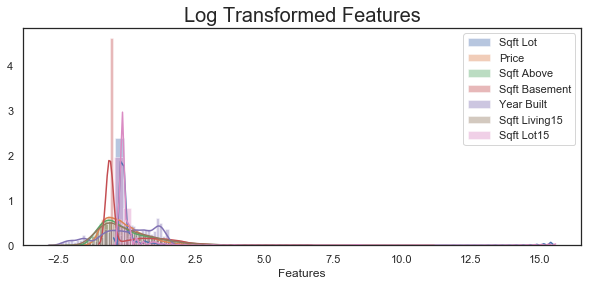

In [63]:
# Checking for normal distribution:
plt.figure(figsize=(10,4))
sns.distplot(kc_housing.sqft_lot, label='Sqft Lot')
sns.distplot(kc_housing.price, label='Price')
sns.distplot(kc_housing.sqft_above, label='Sqft Above')
sns.distplot(kc_housing.sqft_basement, label='Sqft Basement')
sns.distplot(kc_housing.yr_built, label='Year Built')
sns.distplot(kc_housing.sqft_living15, label='Sqft Living15')
sns.distplot(kc_housing.sqft_lot15, label='Sqft Lot15')

plt.title('Log Transformed Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()
plt.show()

Looks way way better now. I would say we are good to go fitting our actual model.

## Summary - Part 3 Exploring our data

Well, there were a lot of steps done in part 3 of our project. Let's quickly summarize what we have done so far:
1. We looked again at all datatypes to gain a quick review
2. We plotted histograms in order to check whether our data was normally distributed - this was not the case!
3. We comfirmed our findings via KDE plots
4. In order to normalize our data we checked boxplots of our data for outliers. Here we found two variables that needed to be transformed ('view' and 'yr_renovated' to category)
5. We then removed the outliers based on our boxplot findings
6. We created joint plots and found that the variables 'bedrooms', 'bathrooms' and 'floors' are better off when being transformed into categorical variables. All sqft_- variables as well as the variable 'yr_built' showed a positive relationship with our target variable 'price'
7. Almost done: We created dummy variables for all our categorical data 
8. Last step: We normalized all our remaining continuous variables

All right, that was a lot. Now we are very excited to be moving on to the critical part of the process: the actual modeling of our data.

# Modeling our data


- Importing libraries (if not yet done so)
- Defining the problem
- Creating a test split
- Fitting the actual model
- Initial Refinement (Stepwise Selection)
- Train Test incl. checking for MSE & RMSE
- Cross Validation

Now it is time to actually fit our model and use our cleaned dataset to predict our target variable 'price'.
In this first project we are using multiple linear regression to model our dataset and to get to know about significant predictors of our target variable. 

Modeling this linear regression can be done via two ways: 
- using statsmodels
- using scikit learn

In order to be very precise here we will be doing both, so we can see if there are any differences between the two processing ways.

For both ways we need to define the problem first:

### Defining the problem

In [64]:
# What is our target/outcome and what are our predictors?
y = kc_housing.price #outcome
X = kc_housing.drop('price', axis=1) #predictors

Let's also already create a train test split so we can use it right after modeling for our validation purposes.:

### Creating a Test Split

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### Fitting the actual Model - Using statsmodels

First we will fit our model using statsmodels. We have already loaded this library in the very first step of this project:

In [66]:
predictors_int = sm.add_constant(X)
model = sm.OLS(y, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     709.2
Date:                Thu, 25 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:27:54   Log-Likelihood:                -17251.
No. Observations:               19460   AIC:                         3.461e+04
Df Residuals:                   19407   BIC:                         3.503e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.4209      0.318      1.322      0.186      -0.203       1.045
sqft_lot                         0.0021      0.007      0.309      0.757      -0.011       0.015
sqft_above                       0.2272      0.010     23.749      0.000       0.208       0.246
sqft_basement                    0.1663      0.006     28.932      0.000       0.155       0.178
yr_built                        -0.2725      0.007    -39.694      0.000      -0.286      -0.259
yr_renovated                 -7.532e-05   6.83e-05     -1.102      0.270      -0.000    5.86e-05
sqft_living15                    0.1298      0.007     17.892      0.000       0.116       0.144
sqft_lot15                      -0.0368      0.007     -5.389      0.000      -0.050      -0.023
waterfront_1.0                   1.2487      0.068     18.302      0.000       1.115       1.382
waterfront_nan                  -0.0067      0.013     -0.497      0.619      -0.033       0.020
view_1                           0.2810      0.036      7.804      0.000       0.210       0.352
view_2                           0.1768      0.022      8.009      0.000       0.134       0.220
view_3                           0.3164      0.031     10.297      0.000       0.256       0.377
view_4                           0.8638      0.048     17.931      0.000       0.769       0.958
condition_2                      0.0686      0.121      0.568      0.570      -0.168       0.305
condition_3                      0.1585      0.112      1.410      0.158      -0.062       0.379
condition_4                      0.2222      0.112      1.976      0.048       0.002       0.443
condition_5                      0.3784      0.113      3.343      0.001       0.156       0.600
grade_11                         0.7394      0.044     16.792      0.000       0.653       0.826
grade_12                         1.7573      0.100     17.504      0.000       1.561       1.954
grade_13                         4.2863      0.589      7.278      0.000       3.132       5.441
grade_3                         -1.7512      0.595     -2.945      0.003      -2.917      -0.586
grade_4                         -1.7230      0.124    -13.937      0.000      -1.965      -1.481
grade_5                         -1.7390      0.050    -34.699      0.000      -1.837      -1.641
grade_6                         -1.5493      0.033    -47.623      0.000      -1.613      -1.486
grade_7                         -1.2323      0.028    -44.621      0.000      -1.286      -1.178
grade_8                         -0.9302      0.025    -36.871      0.000      -0.980      -0.881
grade_9                         -0.4832      0.024    -19.789      0.000      -0.531      -0.435
yr_renovated_cat_before 1980    -0.0398      0.150     -0.266      0.790    

Now we have a really nice overview of our model. What can we get out of it.
Well, first of all, our R-Squared currently is 0.655, which is not bad, but not perfect. Using some statistical words here: our model has an explanatory power of 65%, meaning that the model explains approx. 65% of the variation in our dependent variable ('price').

Let's check out the table below the overview statistics, concerning our variables respectively our predictor variables:
What we can see here is that there are a lot of the p-values of our variables below our significant level of 0.05, which is pretty nice. It basically means that the variables with a p-value lower than 0.05 are predicting the model in an efficient way.

Let's go through the remaining variables once:
- sqft_lot: first variable, first p-value above 0.05 (how random). This means that this variable might worsen our code and we should consider dropping it (via feature selection in a next step)
- sqft_above: showing p < 0.05
- sqft_basement: showing p < 0.05
- yr_built: showing p < 0.05
- yr_renovated: showing p > 0.05, meaning that we should consider dropping the variable (I think we missed out on this one before, since we have now dummy variables for this variable)
- sqft_living15: showing p < 0.05
- sqft_lot15: showing p < 0.05
- waterfront_1.0: showing p < 0.05 (still relevant even though waterfront_nan shows a p > 0.05), with a positive coefficient, meaning that houses on the waterfront are more expensive
- view: all of our dummy variables are showing p < 0.05 with positive coefficients, meaning that houses that are more often viewed predict a higher price
- condition: two of our dummy variables are showing p < 0.05 (making it relevant), with a positive coefficient, so people are paying more for houses that are in a good condition
- grade: all of our grade dummies are showing p < 0.05, with positive coefficients for higher grades and negative coefficients for lower grades, showing that people rate houseprices according to the given grade (only grades 11, 12 & 13 are positively correlated with price)
- yr_renovated_cat: two of our dummies (1990-1999 & 2000-2015) are showing p < 0.05, a positive coefficient and therefore letting us know that people are paying higher prices for shortly renovated houses

### Fitting the actual Model - Using scikit learn

And now we will do the same thing using the scikit learn library, which we have already loaded before:

In [67]:
linreg = LinearRegression()
linreg.fit(X, y)

# estimated coefficient
print("Estimated coefficient:")
print(linreg.coef_)

# estimated intercept
print("Estimated intercept:")
print(linreg.intercept_)

# estimated R²
print("Estimated R²:")
print(linreg.score(X,y))

Estimated coefficient:
[ 2.10995916e-03  2.27238933e-01  1.66271634e-01 -2.72460619e-01
 -7.53239723e-05  1.29779533e-01 -3.67981080e-02  1.24868551e+00
 -6.70054543e-03  2.80958136e-01  1.76815363e-01  3.16386310e-01
  8.63770155e-01  6.85597623e-02  1.58530717e-01  2.22217081e-01
  3.78360005e-01  7.39423117e-01  1.75734895e+00  4.28631265e+00
 -1.75118263e+00 -1.72295064e+00 -1.73901721e+00 -1.54931970e+00
 -1.23228251e+00 -9.30247361e-01 -4.83201387e-01 -3.98365734e-02
  8.49278699e-02  3.09600406e-01  4.90720591e-01  9.96696391e-02
  1.06850014e-01  4.27777028e-01  4.97411650e-01  5.33372159e-01
  2.45691202e-01  3.05154789e-01  4.38635199e-01  3.30358195e-01
  3.43415713e-01  3.66031829e-01  4.08648198e-01  3.49961049e-01
  4.03914332e-01  4.73787806e-01  8.12350909e-01  7.08177433e-01
  1.17118100e+00  5.51460552e-02 -7.28176596e-02 -1.43522859e-01]
Estimated intercept:
0.4208525351211597
Estimated R²:
0.6552057863556204


As we can see here, also this method is giving us the same estimated R-Squared as the statsmodels method.
Nevertheless, I feel like we can do better: 65% is nice but let's try to improve the fit of our model respectively of our R-Squared.
I would like to do so with the feature selection (selecting only the significant variables):

### Initial Refinement - Stepwise selection
We will be starting with an empty model and each time the variable that has an associated parameter with the lowest p-value it is added to the model:

In [68]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [69]:
result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  sqft_basement                  with p-value 0.0
Add  grade_11                       with p-value 0.0
Add  grade_9                        with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  view_4                         with p-value 5.87583e-252
Add  floors_3.0                     with p-value 1.12534e-141
Add  grade_12                       with p-value 5.94068e-84
Add  waterfront_1.0                 with p-value 3.40868e-68
Add  bathrooms_3.25                 with p-value 2.33861e-55
Add  grade_6                        with p-value 1.36997e-58
Add  grade_7                        with p-value 3.85037e-139
Add  grade_8                        with p-value 3.602e-101
Add  grade_5                        with p-value 1.61717e-262
Add  grade_4                        with p-value 1.80165e-54
Add  bathrooms_3.5                  with p-value 1.21345e-31
Add  bat

Awesome - now let's try our model again with only the selected features:

In [70]:
selected_features = ['view_4', 'sqft_above', 'yr_built', 'sqft_living15', 'sqft_basement', 'floors_3.0', 'grade_11', 'grade_12', 'grade_9', 'waterfront_1.0', 'bathrooms_3.25', 'grade_6', 'grade_7', 'grade_8', 'grade_5', 'grade_4', 'bathrooms_3.5', 'bathrooms_3.75', 'condition_5', 'yr_renovated_cat_2000-2015', 'view_3', 'bedrooms_2', 'sqft_lot15', 'view_2', 'view_1', 'grade_13', 'floors_2.5', 'floors_2.0', 'condition_4', 'bedrooms_4', 'floors_1.5', 'bathrooms_3.0', 'bathrooms_2.25', 'yr_renovated_cat_1990-1999', 'grade_3', 'yr_renovated_cat_before 1980', 'bathrooms_2.75']

X_new = kc_housing[selected_features]
predictors_int = sm.add_constant(X_new)
model = sm.OLS(y, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     995.3
Date:                Thu, 25 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:28:22   Log-Likelihood:                -17265.
No. Observations:               19460   AIC:                         3.461e+04
Df Residuals:                   19422   BIC:                         3.491e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.8427      0.026     32.340      0.000       0.792       0.894
view_4                           0.8590      0.048     17.864      0.000       0.765       0.953
sqft_above                       0.2303      0.009     24.718      0.000       0.212       0.249
yr_built                        -0.2653      0.006    -41.481      0.000      -0.278      -0.253
sqft_living15                    0.1295      0.007     17.941      0.000       0.115       0.144
sqft_basement                    0.1702      0.005     31.249      0.000       0.160       0.181
floors_3.0                       0.5021      0.028     17.815      0.000       0.447       0.557
grade_11                         0.7375      0.044     16.769      0.000       0.651       0.824
grade_12                         1.7519      0.100     17.456      0.000       1.555       1.949
grade_9                         -0.4817      0.024    -19.759      0.000      -0.530      -0.434
waterfront_1.0                   1.2489      0.068     18.359      0.000       1.116       1.382
bathrooms_3.25                   0.4588      0.030     15.227      0.000       0.400       0.518
grade_6                         -1.5604      0.032    -48.147      0.000      -1.624      -1.497
grade_7                         -1.2327      0.028    -44.740      0.000      -1.287      -1.179
grade_8                         -0.9262      0.025    -36.921      0.000      -0.975      -0.877
grade_5                         -1.7552      0.049    -35.532      0.000      -1.852      -1.658
grade_4                         -1.7523      0.118    -14.894      0.000      -1.983      -1.522
bathrooms_3.5                    0.3527      0.028     12.455      0.000       0.297       0.408
bathrooms_3.75                   0.8172      0.063     12.954      0.000       0.694       0.941
condition_5                      0.2300      0.017     13.437      0.000       0.196       0.264
yr_renovated_cat_2000-2015       0.3528      0.035     10.107      0.000       0.284       0.421
view_3                           0.3170      0.031     10.326      0.000       0.257       0.377
bedrooms_2                       0.1177      0.014      8.609      0.000       0.091       0.144
sqft_lot15                      -0.0357      0.004     -8.095      0.000      -0.044      -0.027
view_2                           0.1788      0.022      8.105      0.000       0.136       0.222
view_1                           0.2820      0.036      7.834      0.000       0.211       0.353
grade_13                         4.2882      0.589      7.279      0.000       3.134       5.443
floors_2.5                       0.4334      0.057      7.640      0.000       0.322       0.545
floors_2.0                       0.1101      0.013      8.329      0.000    

Well, this unfortunately didn't change our R-Squared at all. Let's move on to the validation of our model in this case and check out if our calculation are still valid.

## Train Test (with previously made formula)

In [71]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14595, 52) (4865, 52) (14595,) (4865,)


### Checking the MSE & Root Mean Squared Error

In [72]:
from sklearn.metrics import mean_squared_error

linreg.fit(X_train, y_train)
yhat_train = linreg.predict(X_train)
yhat_test = linreg.predict(X_test)

# Calculating MSE_train
train_mse = mean_squared_error(y_train, yhat_train)
print('MSE_train:', train_mse)

# Calculating MSE_test
test_mse = mean_squared_error(y_test, yhat_test)
print('MSE_test:', test_mse)

# Calculating RMSE_train
train_rmse = np.sqrt(train_mse)
print('RMSE_train:', train_rmse)

# Calculating RMSE_test
test_rmse = np.sqrt(test_mse)
print('RMSE_test:', test_rmse)

MSE_train: 0.349628329189044
MSE_test: 0.332928879657645
RMSE_train: 0.5912937757063269
RMSE_test: 0.5769998957171872


As we can see here, both our MSE and the RMSE do not differ much across our train and test data, which is a good sign since this means that our model is generalizing quite well and is actually ready to be used in future cases as well.

Now, let's move on to cross validation.

## Cross Validation

Since we do not know if the train test split ratio was well-chosen we might suffer from under/- or overfitting.
In order to eliminate this case we are using cross validation in order to further validate our model.

In [73]:
from sklearn.model_selection import cross_val_score

cv_5 = cross_val_score(linreg, X, y, cv=5, scoring='r2')

In [74]:
cv_5

array([0.67275653, 0.64819301, 0.63266565, 0.6439101 , 0.63408265])

In [75]:
print('Model Accuracy:',round(sum(cv_5)/len(cv_5),2)*100, '%')

Model Accuracy: 65.0 %


We can see here the exact same result as we have seen above at our model, meaning that also applying the cross validation process is confirming our model. We can now move on to interpreting our data.

# Interpreting our Data

The last step of our first project is to interpret what we have found out.
Most of it has already been said but we are going to summarize and dig into this again.

Even though the R-Squared as well as our Adjusted R-Squared weren't perfect, due to well-performing validation results we can still say our model is performing quite well.

The current model explains 65% meaning that we can predict house prices in King County up to 65%. There still is a rather big amount of unpredictability in my model (35%). This can be due to missing variables or because we dropped some variables (maybe the wrong ones) in the first place.

Let's have a look on our coefficients (based on our normalized data):

In [76]:
model.params.sort_values(ascending = False)

grade_13                        4.288173
grade_12                        1.751891
waterfront_1.0                  1.248933
view_4                          0.859016
const                           0.842728
bathrooms_3.75                  0.817207
grade_11                        0.737509
floors_3.0                      0.502079
bathrooms_3.25                  0.458770
floors_2.5                      0.433378
yr_renovated_cat_2000-2015      0.352808
bathrooms_3.5                   0.352702
view_3                          0.316973
view_1                          0.282017
sqft_above                      0.230337
condition_5                     0.229986
view_2                          0.178844
yr_renovated_cat_1990-1999      0.170856
sqft_basement                   0.170229
sqft_living15                   0.129499
bathrooms_3.0                   0.125156
bedrooms_2                      0.117691
floors_2.0                      0.110101
floors_1.5                      0.102767
condition_4     

What we can see here is our strongest positive coefficients at the top and the strongest negative coefficients at the end. Let's dig deeper:

- grade_13 (and 12): This is our highest scoring coefficient (4.29), meaning that this should be the variable that best predicts house prices in King County. Grading of houses is done by an independent federal office, meaning that interested buyers can highly rely on the grade given to the house. This means that people are willing to pay more for houses that are graded higher. On the contrary, the last coefficients in our table are also grade-dummies. This time it is the more negatively ranked house (grade_3 - grade_9), which obviously people are not willing to pay a lot for. Since the coefficient is negative, we can actually say that this variables negatively impacts the price variable.

- waterfront_1: This is the third highest scoring coefficient in our table (1.25), meaning that people are paying higher prices for houses that are on the waterfront

- view_4: I didn't really expect this I must say! A house that has been viewed 4 times is more likely to call for a higher price than others.

Other worth mentioning variables that are positively correlated with our target variable 'price' are 'bathrooms_3.75', 'floors_3.0' and 'yr_renovated_cat_2000-2015'

When it comes to negatively correlated variables we have already mentioned the grading variables, but also interseting to see is that the variable 'yr_renovated_cat_before_1980' is also rather highly negatively correlated with the variable 'price', meaning that people are paying less for houses that haven't been renovated shortly.
